# Week 6 - Modules and Libraries

Programmers are lazy - we like making things easier for ourselves by writing for loops to automate processes for us, and create classes and other structures to make sense of complex data. Perhaps the biggest and best form of laziness in programming is the idea of sharing code with peers in the form of *libraries*

Libraries are collections of code created by other people that can be bought into Python on demand to solve problems or make our lives significantly easier. These libraries can be small, low level packages that interact with fundamental Python objects (`socket` for example, provides very low level networking code), to extremely elaborate packages that run websites (`flask`, `django`) or build deep learning neural network models (`pytorch`, `tensorflow`).

We can also publish our own code to the public Python repository (a sort of meta-library containing information of all other libraries) through a publication process, while still being allowed to use other people's libarires (if licence allows); building a dependency tree that Python automatically resolves when attempting to install. Unfortunately this is a bit invoved and not really feasible to do from Colab

This week we'll do a deep dive into what a library is; how to install them; some helpful ones to get started with, and some examples of what problems these let us solve.

## What is a Library?

*Libraries*, *modules*, *packages* - these names are all pretty much interchangable. These all reference code that we import into Python somehow that allows us to piggy-back on what someone else has written. This code is usually normal Python written by mortals like you or I; and maintained by an army of voluenteers. By default, Python will look at the public python index at https://pypi.org - this is an index of all the publically published Python libaries that exist, and we can find all the "big players" here.

We can also self-host a Python package index for private packages to share code within a company. How this is achieved isn't really too important for now but just know that Python does not for all packages to be made publically available, but it's "in the spirit" of programming to share your work!

As with anything in Python, libaries are an object with a type and methods:

In [4]:
import datetime
print(type(datetime))

<class 'module'>


In many ways, this class represents a "top level" of a folder containing all the code we want to use. In this folder, there may be other folders, files, functions and classes that we can access through the library's namespace.

## How do we install Libraries?

Some libraries in Python are built in (such as `datetime` above), and don't need any installation process to work. These come with Python and are only not available by default to speed some things up - we don't always need to send an email or make low level network connections if we're just doing some maths!

Google Colab comes with an additional fantastic suite of libraries pre-installed that are somewhat geared towards data science. In Colab, we can import these just like any built in library. We'll see how to view the installed libraries in just a second.

Finally, to install libraries that we don't have installed, we use the command line `pip` tool. This tool is what we mainly use for installing, managing and creating Python packages, although wrappers around this tool exist to make our lives a bit easier in certain circumstances.

### FIRST: A Note on using the Command Line in Colab

Sometimes we will want to run terminal commands in Colab rather than Python - these are system commands used to manage the server we are on. Normally, with a local Python installation, this is the default interface (rather than Python) - however in a Jupyter notebook we have to use the following syntax to run commands:

In [1]:
!echo "Hello world"

Hello world


Any line starting with a `!` will run as a `bash` (or terminal) command instead of Python. Here we are using the `echo` command (which is like Python's `print`) to display Hello World in the output.

Getting comfortable with the command line and bash scripting is a very helpful skill to have in coding, but I'll give you all the commands you need to run through bash in this course when needed.

To use the command line to install a Python package, we use the command:

In [2]:
!pip install requests

Python will look for the package in the index, and install the package along with any prerequisites it has. You'll see that this package is already installed (your output might be slightly different) - to list all the packages we have, we use the following command:

In [3]:
!pip list

Package             Version
------------------- ---------
anyio               3.3.2
appnope             0.1.2
argon2-cffi         21.1.0
attrs               21.2.0
Babel               2.9.1
backcall            0.2.0
bleach              4.1.0
certifi             2021.5.30
cffi                1.14.6
cfgv                3.3.1
charset-normalizer  2.0.6
colorednoise        2.1.0
cryptography        38.0.1
cycler              0.10.0
debugpy             1.5.0
decorator           5.1.0
defusedxml          0.7.1
distlib             0.3.4
entrypoints         0.3
filelock            3.7.1
identify            2.5.1
idna                3.2
iniconfig           1.1.1
ipykernel           6.4.1
ipython             7.28.0
ipython-genutils    0.2.0
ipywidgets          7.6.5
jedi                0.18.0
Jinja2              3.0.2
joblib              1.1.0
json5               0.9.6
jsonschema          4.0.1
jupyter             1.0.0
jupyter-client      7.0.6
jupyter-console     6.4.0
jupyter-core        4.8.1

Each one of these packages is a suite of tools around a single theme, for example `cryptography` contains a collection of classes, functions and other objects related to cryptography.

`pip` is very powerful - to check out all of it's features, we can use the `-h` flag:

In [4]:
!pip -h


Usage:   
  pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper co

We shouldn't need to poke around too much with `pip` in this course as Colab has most of the libraries installed - however it's still essential to know how to install packages for when you work locally or on a server without Colab!

Now we know what modules are and how to install them, let's look at some popular ones and some ways to use them.

## Popular Libaries and How To Use Them

A very popular problem in Python is managing dates and times in a clever way. We *could* store everything as a string or a dictionary of hours, minuites and seconds - but this is all a bit stilly. Python provides us with a `datetime` library to manage date and time instances and some helper functions to help out.

To import `datetime` we have a few options:

In [5]:
import datetime

print(datetime.datetime.now())

2022-10-24 11:38:41.171356


This is the simplest way of importing a module - we import the root library and then call the sublibraries from it in the same way we would an attribute or method. Confusingly, `datetime` has a sublibrary with the same name - this is the DateTime object that stores date and time information together.

This is a lot of code, and we might have a lot of calls to the `datetime` library, so we have a few options on how to clean this code up. We can import under an *alias* with the following syntax:

In [6]:
import datetime as dt

print(dt.datetime.now())

2022-10-24 11:42:22.388057


Most common libraries have an "agreed upon" shortening for importing under (`dt` for `datetime`, `it` for `itertools` etc) - so it's common to see these floating around. If we don't want to use any of the other sublibraries in `datetime` (i.e. we only want the base `datetime` object), we can use the following:

In [8]:
from datetime import datetime

print(datetime.now())

2022-10-24 11:44:21.376684


We can combine these two approaches (using a different sublibrary because why not!)

In [9]:
from datetime import timedelta as td

print(td(days=1))

1 day, 0:00:00


You may see the following sometimes:

In [10]:
from datetime import *

print(datetime.now())
print(timedelta(days=1))

2022-10-24 11:45:39.399689
1 day, 0:00:00


All this is doing is importing all the sublibraries of `datetime` under their own name - like we're writing `from datetime import datetime`, `from datetime import timedelta` etc. In general, **try and avoid this**, and **be fairly specific with imports** - if we import everything from a module under it's own name, we might run into naming conflicts (for example, what if two libraries have a `call()` function?).

In general, only import modules you need!

## Using `datetime` to solve some real problems

If we have someone's date of birth, we can use the datetime library to parse it from a string and calculate their age:

In [21]:
from datetime import datetime as dt

# We could get this string from anywhere - a user input on a form for example
date_of_birth = "04/03/1996"

# Overwrite the above with the parsed datetime object
# Format is a code available in the docs
date_of_birth = dt.strptime(date_of_birth, "%d/%m/%Y")

# Get the time difference between now and when user was born
age = dt.now() - date_of_birth

# timedelta doesn't have years, only days - so we need to calculate this!
print("User is:", age.days // 365, "years old.")


User is: 26 years old.


## `collections` for easy wins

The `collections` libary offers a few new data structures that make our life way easier for solving common problems. Say we are building an ordering system for food service and recieve the orders in the following way:

In [23]:
order_one = ["burger", "wrap", "burger", "chips"]
order_two = ["burger", "wrap", "wrap", "salad"]

If we want to count the total number of each item we need to prepare, we can do the following:

In [24]:
items = {}

# For each order in the list of orders...
for order in [order_one, order_two]:
    # For each item in each order... 
    for item in order:
        # If the item is being kept track of, add one to it
        if item in items:
            items[item] += 1
        # Otherwise, set it to one
        else:
            items[item] = 1

print(items)

{'burger': 3, 'wrap': 3, 'chips': 1, 'salad': 1}


This is a really common problem in Python - just simply counting the number of items in a list - but the code is so involved and error prone (it's very tempting not to use the `if/else` here, but you get an error straight away as `"burger"` isn't in the dictionary!).

This becomes so much easier by using the `Counter` object:

In [26]:
from collections import Counter

# Wow!!!!!!
print(Counter(order_one) + Counter(order_two))

Counter({'burger': 3, 'wrap': 3, 'chips': 1, 'salad': 1})


## Randomisation with `random`

Sometimes we just want to generate random data for some reason - either randomly selecting the names from a list for a competition or statistically modelling the outcomes of some random process. For this - the `random` library has all you need. It should be noted that although these numbers give a statstically random distribution, it is possible to theoretically predict their outcome as the process is *psuedo-random*.

For example, let's make a few functions to test the distribution of dice rolls:

In [9]:
import random
from collections import Counter

def roll(no_sides=6):
    return random.randint(1, no_sides)

def roll_n(number_of_dice, no_sides=6):
    return sum([roll(no_sides) for _ in range(number_of_dice)])

outcomes = [roll_n(2) for _ in range(100000)]

print(Counter(outcomes))

Counter({7: 16669, 6: 13960, 8: 13949, 5: 11252, 9: 11122, 4: 8384, 10: 8280, 3: 5450, 11: 5435, 12: 2771, 2: 2728})


Using just a few lines of code we see that rolling two dice does not give equal chances for each sum to come up - in fact a 7 is around 6 times as likely as a 2!

## Plotting data with `matplotlib`

Hopefully it's clear how the collections and datetime libraries are working - they are providing custom wrappers around data with methods that can make our lives easier. It's not impossible that we could write these libraries ourselves - they aren't too large and we can make some guesses how they work under the hood.

One library where this isn't the case is `matplotlib` - a fundamental library for plotting data that is a foundation for any data visualisation in Python. I won't go into too much detail with `matplotlib` as it's covered in detail in the data science course, but we can plot some data easily using the following function:

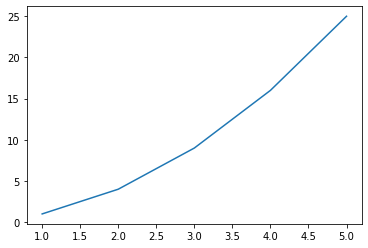

In [28]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4,5], [1,4,9,16,25])
plt.show()

## Using `flask` to build websites

`flask` is a Python package that lets us build backend code for websites - this is the code that handles all the "behind the scenes processing" such as user management, interacting with a database, authentication and more. To get `flask` working in Colab we need to jump through some more hoops, but it is still more than doable.

SAM NOTE: You may need to livecode this if it doesn't work in the session.
SAM NOTE: Remember the auth token! Not putting it on github for obvious reasons.

In [25]:
!pip install flask flask-ngrok pyngrok
!ngrok authtoken <auth_token>

zsh:1: parse error near `>'


In [27]:
from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)   
  
@app.route("/")
def home():
    return "<h1>Hello world!</h1>"
    
app.run()

## Organising your own code using libraries

There will come a point where you have a project so large that it becomes infeasible to hold it all in one file - very often libraries are split up into multiple files to denote sublibraries that are imported using the `parent_package.subpackage` syntax. We can import objects from other files by using the import syntax in a special way: 

In [2]:
from other_file import other_file_hello_world

other_file_hello_world()

🎵 Hello from the other file!


It's worth saying that we've now seen a number of ways to organise our code - we have classes that contain methods, files, libraries and even their own subfolders. It can be hard to how to oragnise your projects, but this simply takes time and experience. Personally, I start with a library and write everything as classes, and as certain themes become more important they get their own file.

Splitting your projecti nto multiple files is also a great way of preparing to publish your project to `pip`. This isn't really possible with Colab so we won't really cover it here - but it's a few config files and commands and then you're ready to go.

SAM NOTE: For the sessions, use [this package template to explain.](https://github.com/stmball/stmball_python_package_template) 

## Exercises

This week's exercises will require significantly more searching online for the correct function to use from the libraries documentation - this is intentional as you'll need to do this whenever using a new package! All the packages in these exercises have excellent documentation (some packages less so!), so this should be fine.

### Working with Dates and Times

Using the `datetime` libary, write a function to:

* Calculate the number of days between two dates
* Take in a user's input for their date of birth, and calculate how many seconds they've been alive
* Output a human readable version of the current time in the form (for example): "Today is Monday 28th October, 2022. The time is 6:30pm".
* Return the last friday of a given month.

### Using Collections

The `collections` library gives us some helpful datastructures out of the box that we can abuse to solve some very complex problems. Write a function to solve the following problems:

* A few weeks ago we wrote some code to check if two words are anagrams of one another - using `Counters` you should be able to rewrite this into a lot simpler code
* Another actual job interview question: write a function that takes in a list of strings, and outputs the number of unique anagram groups from that list. For example `["dog", "god", "apple"]` would return 2, since `dog` and `god` form one anagram group, and `apple` the second.
*  The `Counter` object is actually a specific case of the `defaultdict` object. This object allows for creations of dictionaries with a default initial parameter for when we try and index a value that doesn't exist. We are in charge of a HR department for a small startup that has the following departments: Data, Security, Finance, HR, Management and Development. We are asked to build a program that given a list of employees and departments, outputs a dictionary that contains each department as a key and their relevant employees. However - if a department has no employees, when indexed it should just give an empty list.

## Testing Randomness

The `random` library has a few applications and quirks.

* Build a Python program for Bingo - this program should randomly sample numbers from 1 to 99 *without replacement*, and print out the calls one by one (you can even check out `time.sleep` to automate this!)
* With the above code, also create a function for bingo cards - containing 25 numbers randomly chosen from 1 to 99. 
* Finally, write a program that starts a bingo game with `n` people, generates a bingo card for each one, and starts the bingo game. When all the numbers on one person's card are checked off, that person should be declared a winner and the game stopped.
